# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_09': 0,
                'chr_9_inversion': 1                
               }

## File Import

In [3]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'

theWhole = {}


f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [4]:
theWhole['chr_9_inversion']

['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-1.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-10.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-11.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-12.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-2_.jpg.9invs.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-3.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-4.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-5.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-6.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\

## Image Input

In [5]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.01995682716369629


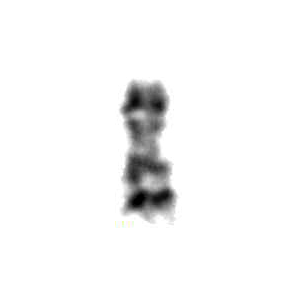

In [6]:
image['chr_9_inversion'][1]

## Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [9]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

18.8376362323761


In [10]:
imageMatrix = np.array(data['chr_9_inversion'][1])

In [11]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

In [12]:
len(x_train_list[1])

300

In [13]:
len(y_train_list)

109

### Validation Dataset

In [14]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\test\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\test\\'

theWhole = {}

f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [15]:
image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)    

### Data Extraction

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [18]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

## Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
len(X_train)

109

In [23]:
len(y_train)

109

In [24]:
X_train[0].shape

(300, 300)

## Save the Datasets

In [25]:
np.save('X_train_2D_KaryoLearning_Abnormal', X_train)
np.save('y_train_2D_KaryoLearning_Abnormal', y_train)

In [26]:
np.save('X_test_2D_KaryoLearning_Abnormal', X_test)
np.save('y_test_2D_KaryoLearning_Abnormal', y_test)

## Load the Datasets

In [27]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [28]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

#### Tensorboard Initilization

In [32]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [34]:
model.fit(X_train, y_train, epochs=120, batch_size=32, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/120
4/4 [==============================] - 7s 2s/step - loss: 413.7671 - accuracy: 0.6330 - val_loss: 96.4608 - val_accuracy: 0.5000
Epoch 2/120
4/4 [==============================] - 6s 1s/step - loss: 55.4198 - accuracy: 0.6697 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 3/120
4/4 [==============================] - 6s 1s/step - loss: 3.7754 - accuracy: 0.5505 - val_loss: 30.1220 - val_accuracy: 0.5000
Epoch 4/120
4/4 [==============================] - 6s 1s/step - loss: 7.0371 - accuracy: 0.7064 - val_loss: 54.2943 - val_accuracy: 0.5000
Epoch 5/120
4/4 [==============================] - 6s 1s/step - loss: 5.0283 - accuracy: 0.8899 - val_loss: 0.9299 - val_accuracy: 0.5000
Epoch 6/120
4/4 [==============================] - 6s 1s/step - loss: 0.3359 - accuracy: 0.8899 - val_loss: 4.4735 - val_accuracy: 0.5000
Epoch 7/120
4/4 [==============================] - 6s 1s/step - loss: 0.5212 - accuracy: 0.8899 - val_loss: 1.1054 - val_accuracy: 0.5000
Epoch 8/120
4/4 [===========

Epoch 60/120
4/4 [==============================] - 6s 2s/step - loss: 3.3794e-07 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 0.9500
Epoch 61/120
4/4 [==============================] - 6s 1s/step - loss: 2.3404e-07 - accuracy: 1.0000 - val_loss: 0.3802 - val_accuracy: 0.9500
Epoch 62/120
4/4 [==============================] - 6s 1s/step - loss: 1.8264e-07 - accuracy: 1.0000 - val_loss: 0.3900 - val_accuracy: 0.9500
Epoch 63/120
4/4 [==============================] - 6s 1s/step - loss: 1.3999e-07 - accuracy: 1.0000 - val_loss: 0.3976 - val_accuracy: 0.9500
Epoch 64/120
4/4 [==============================] - 6s 1s/step - loss: 1.2030e-07 - accuracy: 1.0000 - val_loss: 0.4032 - val_accuracy: 0.9500
Epoch 65/120
4/4 [==============================] - 6s 1s/step - loss: 9.7336e-08 - accuracy: 1.0000 - val_loss: 0.4071 - val_accuracy: 0.9500
Epoch 66/120
4/4 [==============================] - 6s 1s/step - loss: 9.0774e-08 - accuracy: 1.0000 - val_loss: 0.4099 - val_accuracy: 0.9500

KeyboardInterrupt: 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### Tensorboard Display

In [37]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19732), started 22:30:40 ago. (Use '!kill 19732' to kill it.)

## Performance Measures

In [38]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.950


In [39]:
len(X_test)

20

In [40]:
y_predict = model.predict(X_test)

In [41]:
y_predict

array([[1.00000000e+00, 2.24358843e-08],
       [1.00000000e+00, 4.40480951e-14],
       [1.00000000e+00, 5.31490375e-19],
       [1.00000000e+00, 2.39968916e-08],
       [1.00000000e+00, 1.89264958e-11],
       [1.00000000e+00, 1.17930041e-10],
       [1.00000000e+00, 2.97795981e-14],
       [1.00000000e+00, 4.04044013e-17],
       [1.00000000e+00, 2.79573783e-06],
       [1.00000000e+00, 4.70604675e-13],
       [1.08452976e-01, 9.99676704e-01],
       [7.69174993e-02, 9.95995045e-01],
       [2.06911564e-03, 9.99973178e-01],
       [3.73181701e-03, 9.99906361e-01],
       [1.80276334e-02, 9.99297500e-01],
       [1.30469799e-02, 9.99238372e-01],
       [1.63990259e-03, 9.99979794e-01],
       [6.02456927e-03, 9.99722004e-01],
       [9.98077393e-01, 9.82143283e-02],
       [1.76367164e-03, 9.99978244e-01]], dtype=float32)

In [42]:
y_predict[0]

array([1.0000000e+00, 2.2435884e-08], dtype=float32)

In [43]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []
y_predict_filtered_prob = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)
    y_predict_filtered_prob.append(maximum)

### Confusion Matrix (混淆矩阵)

In [44]:
label = ['chr_09', 'chr_9_inversion']

In [45]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_09,chr_9_inversion
chr_09,10,0
chr_9_inversion,1,9


In [46]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

   micro avg       0.95      0.95      0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



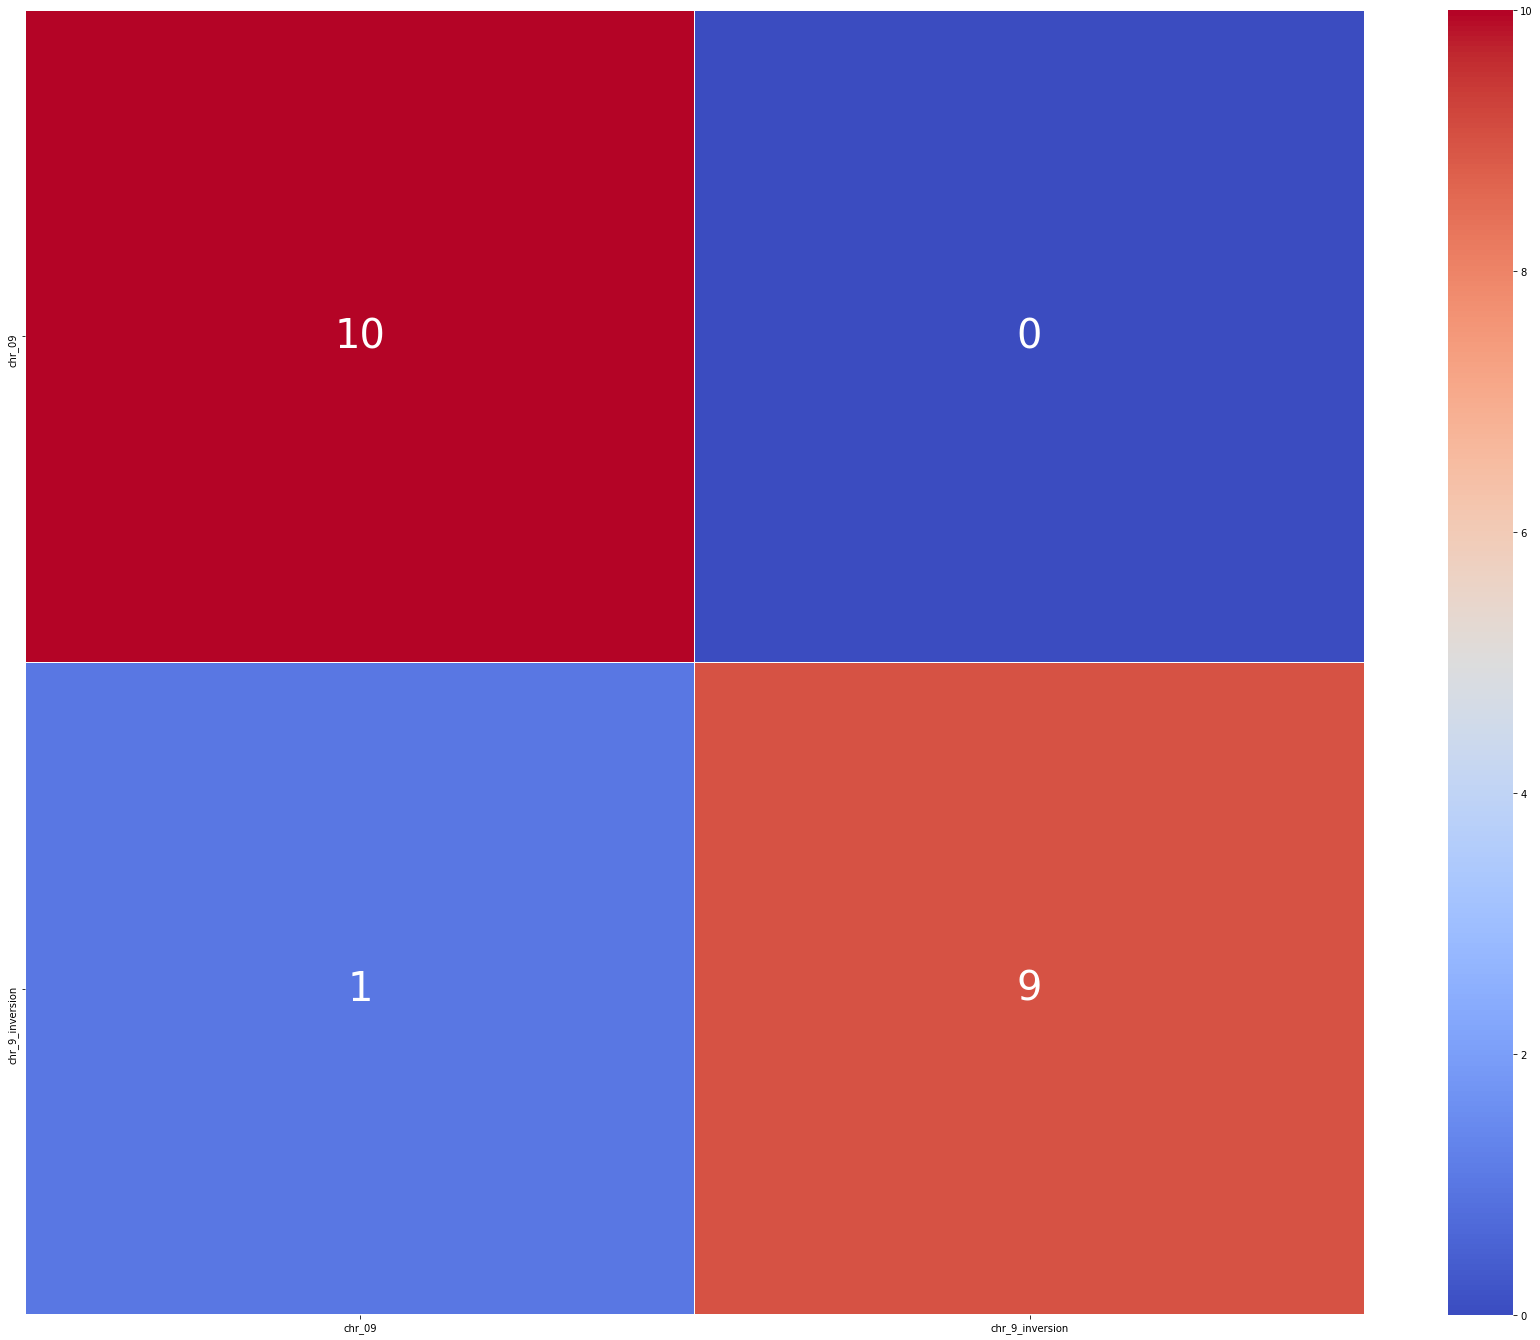

In [47]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 40})

## Save the Model

In [48]:
model.save('saved_model/model_cnn')

INFO:tensorflow:Assets written to: saved_model/model_cnn\assets


## Load the Model

In [49]:
model_reload = keras.models.load_model('saved_model/model_cnn')

In [74]:
y_predict = model_reload.predict(X_test)

In [75]:
y_predict

array([[1.00000000e+00, 2.24358843e-08],
       [1.00000000e+00, 4.40480951e-14],
       [1.00000000e+00, 5.31490375e-19],
       [1.00000000e+00, 2.39968916e-08],
       [1.00000000e+00, 1.89264958e-11],
       [1.00000000e+00, 1.17930041e-10],
       [1.00000000e+00, 2.97795981e-14],
       [1.00000000e+00, 4.04044013e-17],
       [1.00000000e+00, 2.79573783e-06],
       [1.00000000e+00, 4.70604675e-13],
       [1.08452976e-01, 9.99676704e-01],
       [7.69174993e-02, 9.95995045e-01],
       [2.06911564e-03, 9.99973178e-01],
       [3.73181701e-03, 9.99906361e-01],
       [1.80276334e-02, 9.99297500e-01],
       [1.30469799e-02, 9.99238372e-01],
       [1.63990259e-03, 9.99979794e-01],
       [6.02456927e-03, 9.99722004e-01],
       [9.98077393e-01, 9.82143283e-02],
       [1.76367164e-03, 9.99978244e-01]], dtype=float32)

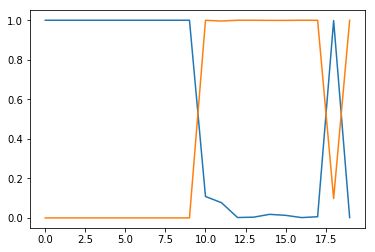

In [106]:
plt.plot(y_predict)

In [107]:
y_predict[:,1]

array([2.2435884e-08, 4.4048095e-14, 5.3149038e-19, 2.3996892e-08,
       1.8926496e-11, 1.1793004e-10, 2.9779598e-14, 4.0404401e-17,
       2.7957378e-06, 4.7060468e-13, 9.9967670e-01, 9.9599504e-01,
       9.9997318e-01, 9.9990636e-01, 9.9929750e-01, 9.9923837e-01,
       9.9997979e-01, 9.9972200e-01, 9.8214328e-02, 9.9997824e-01],
      dtype=float32)

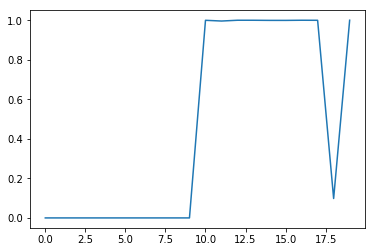

In [108]:
plt.plot(y_predict[:,1])

In [109]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
y_test_reverse = []
for item in y_test:
    y_test_reverse.append(1-item)

In [181]:
y_test_reverse_array = np.array(y_test_reverse)

In [182]:
y_test_reverse_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## ROC

In [200]:
y_predict

array([[1.00000000e+00, 2.24358843e-08],
       [1.00000000e+00, 4.40480951e-14],
       [1.00000000e+00, 5.31490375e-19],
       [1.00000000e+00, 2.39968916e-08],
       [1.00000000e+00, 1.89264958e-11],
       [1.00000000e+00, 1.17930041e-10],
       [1.00000000e+00, 2.97795981e-14],
       [1.00000000e+00, 4.04044013e-17],
       [1.00000000e+00, 2.79573783e-06],
       [1.00000000e+00, 4.70604675e-13],
       [1.08452976e-01, 9.99676704e-01],
       [7.69174993e-02, 9.95995045e-01],
       [2.06911564e-03, 9.99973178e-01],
       [3.73181701e-03, 9.99906361e-01],
       [1.80276334e-02, 9.99297500e-01],
       [1.30469799e-02, 9.99238372e-01],
       [1.63990259e-03, 9.99979794e-01],
       [6.02456927e-03, 9.99722004e-01],
       [9.98077393e-01, 9.82143283e-02],
       [1.76367164e-03, 9.99978244e-01]], dtype=float32)

In [184]:
y_predict_processed = y_predict[:, 0]

In [185]:
y_predict_processed

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.10845298, 0.0769175 , 0.00206912, 0.00373182, 0.01802763,
       0.01304698, 0.0016399 , 0.00602457, 0.9980774 , 0.00176367],
      dtype=float32)

In [186]:
y_test_reverse_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
fpr , tpr , thresholds = roc_curve(y_test_reverse_array , y_predict_processed, pos_label=1)

In [193]:
fpr

array([0., 0., 1.])

In [194]:
tpr

array([0., 1., 1.])

In [195]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 1.6399026e-03], dtype=float32)

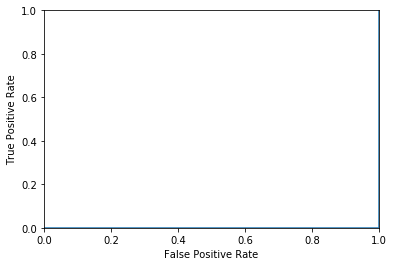

In [196]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(tpr, fpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [ ]:
y_predict_selected

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict)

In [ ]:
y_predict_selected

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict_selected)

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test)

In [ ]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

In [177]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

In [179]:
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [180]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

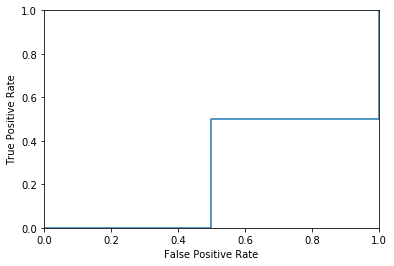

In [178]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(tpr, fpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 